#**SIT 720 - Machine Learning**

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

#**Assessment Task 2 (30 marks)**

##**Submission Instruction**
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A2_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [ ]:
# Student ID: 219296087

# Student name: Gulbaz Khan

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import DistanceMetric
from math import radians

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.decomposition import PCA
random.seed(0)

## Part 1: Clustering *(15 marks)*

Let's assume you want to design an environment to predict a class/category from a dataset based on specific features of that class. However, all the features are not strong enough or in other words features not that much variance/uniqueness across the classes. So, you have to design a clustering model by answering the following questions:

1. Download the attached clustering.csv file. Read the file and separate the class and feature matrix. __(2 marks)__

In [ ]:
df = pd.read_csv('clustering.csv')
features = df.drop('Class', axis = 1)
classes = df["Class"]

In [ ]:
df.head()

,height,length,width,std,min,max,kurtosis,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [ ]:
features.head()

,height,length,width,std,min,max,kurtosis
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


2. Determine the number of clusters from the dataset. Is this same as the actual number of classes in the dataset? __(1 marks)__

<!-- Choose the best three features using different selection criteria (ANOVA, Chi-squared) based on the purity score for the k-mean cluster (Euclidean distance matrix). Which one is good and why? __(5 marks)__ -->

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_df = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_df, columns=features.columns)
scaled_df.head()

,height,length,width,std,min,max,kurtosis
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356


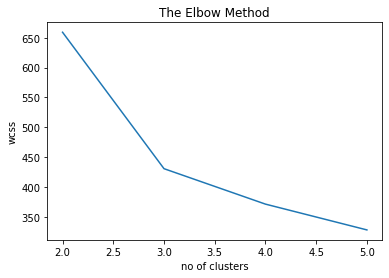

In [ ]:
wcss=[]
scores = []
cluster_num = [2,3,4,5]

for i in cluster_num:
#     print("Working on {} Clusters".format(i))
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(cluster_num, wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
classes.value_counts()

2    70
1    70
0    70
Name: Class, dtype: int64

### Answer
Elbow method is used to deduce the optimal number of clusters for this dataset. By running iterations till 5 clusters, the elbow method displays an **ELBOW** at 3 clusters. The total number of unique classes in the dataset is also 3 so the results of the elbow method seem to be correct


3. Perform K-Means clustering on the complete dataset and report purity score. __(2 marks)__ 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_df, columns=features.columns)

kmeansmodel = KMeans(n_clusters= 3 , init='k-means++') #, random_state=0, n_init=10, max_iter = 300
y_kmeans= kmeansmodel.fit_predict(scaled_df)
scaled_df["Cluster"] = y_kmeans
scaled_df['true'] = df.Class.values

In [ ]:
scaled_df

,height,length,width,std,min,max,kurtosis,Cluster,true
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,2,0
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,2,0
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,2,0
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,2,0
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,2,0
...,...,...,...,...,...,...,...,...,...
205,-0.915515,-1.043321,0.309736,-1.112048,-0.736716,-0.046135,-1.097413,1,2
206,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156,1,2
207,-0.567571,-0.690247,0.733948,-0.888070,-0.070604,3.076588,-0.718060,1,2
208,-1.036090,-1.035645,-0.801701,-1.026077,-1.121521,-0.068135,-0.742535,1,2


In [ ]:
scaled_df.Cluster = scaled_df.Cluster.replace({1: 2, 0:1,
                                                   2: 0})

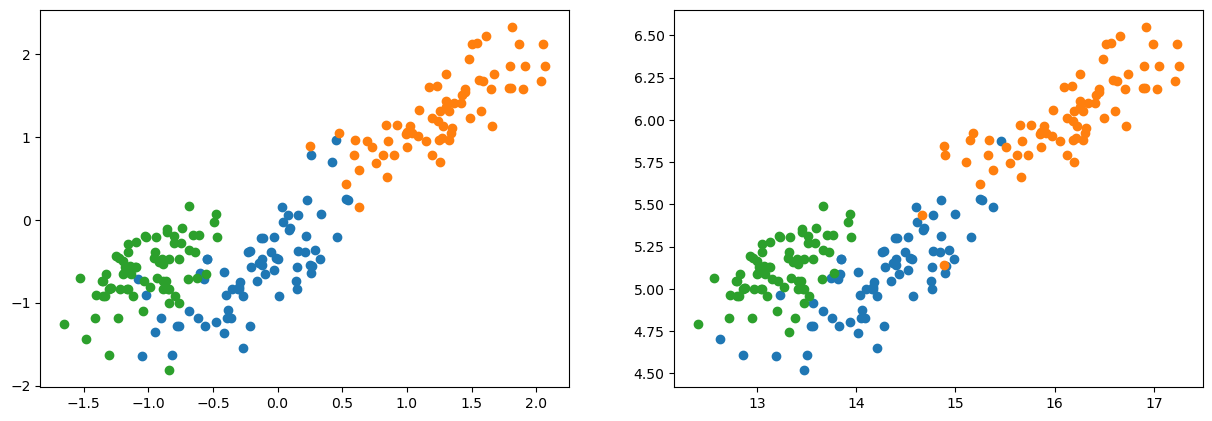

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5), dpi=100, nrows=1, ncols=2)

groups = scaled_df.groupby('Cluster')
for name, group in groups:
    ax[0].plot(group["length"], group["kurtosis"], scalex=75, scaley=75,marker="o", linestyle="", label=name)
    
true_groups = df.groupby('Class')

for name, group in true_groups:
    ax[1].plot(group["length"], group["kurtosis"], scalex=75, scaley=75,marker="o", linestyle="", label=name)

In [ ]:
purity = scaled_df[scaled_df['Cluster'] == scaled_df['true']].shape[0] / scaled_df.shape[0]
print("PURITY OF KMEANS: {}".format(round(purity,4) * 100))

PURITY OF KMEANS: 91.9


4. There are several distance metrics for  K-Means such as euclidean, squared euclidean, Manhattan, Chebyshev, Minkowski. [ __Hints:__ See the pyclustering library for python.]
    
    - Your job is to compare the purity score of k-means clustering for different distance metrics. __(5 marks)__ 
    - Select the best distance metric and explain why this distance metric is best for the given dataset. __(2 marks)__ 

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_df, columns=features.columns)

### EUCLIDEAN

In [ ]:
dist = DistanceMetric.get_metric('euclidean')
euclidean = pd.DataFrame(dist.pairwise(scaled_df.to_numpy()))

kmeansmodel = KMeans(n_clusters= 3 , init='k-means++') #, random_state=0, n_init=10, max_iter = 300
y_kmeans= kmeansmodel.fit_predict(euclidean)
euclidean["Cluster"] = y_kmeans
euclidean['true'] = classes.values

In [ ]:
euclidean

,0,1,2,3,4,5,6,7,8,9,...,202,203,204,205,206,207,208,209,Cluster,true
0,0.000000,1.184688,2.102054,1.879306,1.683041,1.553753,1.142772,1.453547,1.696839,1.247950,...,3.384079,4.691713,2.533377,2.640000,3.306939,4.466194,2.816600,3.139290,0,0
1,1.184688,0.000000,1.698957,1.341778,1.364521,1.238171,1.807871,1.320842,2.508722,1.788720,...,3.399025,5.209843,2.808509,2.608975,3.559361,5.021254,3.027452,3.592289,0,0
2,2.102054,1.698957,0.000000,0.552637,1.801760,0.576858,1.632160,0.756831,3.360315,2.486372,...,2.809401,4.058812,2.586940,1.918692,3.270237,3.883935,2.932551,2.867742,0,0
3,1.879306,1.341778,0.552637,0.000000,1.768949,0.492234,1.609754,0.626189,3.261492,2.423515,...,2.700938,4.283738,2.406331,1.823983,3.107003,4.116142,2.720835,2.890072,0,0
4,1.683041,1.364521,1.801760,1.768949,0.000000,1.553400,2.074535,1.710389,2.182717,1.209250,...,4.252133,5.347149,3.691582,3.365883,4.468397,5.074054,4.001320,4.132375,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2.640000,2.608975,1.918692,1.823983,3.365883,1.845318,1.925478,1.673533,4.081627,3.554565,...,0.907336,3.274070,1.010312,0.000000,1.425636,3.288595,1.237650,1.480096,2,2
206,3.306939,3.559361,3.270237,3.107003,4.468397,3.073711,2.703599,2.850591,4.616355,4.358893,...,0.882912,3.317313,0.837695,1.425636,0.000000,3.433510,0.608382,1.363500,2,2
207,4.466194,5.021254,3.883935,4.116142,5.074054,3.981792,3.376232,3.802675,5.267018,4.924957,...,3.400242,0.494192,3.320842,3.288595,3.433510,0.000000,3.702754,2.127413,2,2
208,2.816600,3.027452,2.932551,2.720835,4.001320,2.666758,2.340547,2.453248,4.161976,3.896339,...,1.038837,3.648210,0.526617,1.237650,0.608382,3.702754,0.000000,1.587558,2,2


In [ ]:
euclidean.Cluster = euclidean.Cluster.replace({1: 2,
                                                   2: 0, 0:1})

In [ ]:
purity = euclidean[euclidean['Cluster'] == euclidean['true']].shape[0] / euclidean.shape[0]
print("PURITY OF EUCLIDEAN: {}".format(round(purity, 4) * 100))

PURITY OF EUCLIDEAN: 87.14


### MANHATTAN

In [ ]:
dist = DistanceMetric.get_metric('manhattan')
manhattan = pd.DataFrame(dist.pairwise(scaled_df.to_numpy()))

kmeansmodel = KMeans(n_clusters= 3 , init='k-means++') #, random_state=0, n_init=10, max_iter = 300
y_kmeans= kmeansmodel.fit_predict(manhattan)
manhattan["Cluster"] = y_kmeans
manhattan['true'] = classes.values

In [ ]:
manhattan

,0,1,2,3,4,5,6,7,8,9,...,202,203,204,205,206,207,208,209,Cluster,true
0,0.000000,2.635627,4.610638,4.262047,3.362873,3.361101,2.347747,3.387408,3.627578,3.034682,...,8.217623,9.179354,6.431282,6.574607,8.363693,8.151083,7.101548,6.952365,2,0
1,2.635627,0.000000,3.579040,3.230449,3.216779,2.440964,2.642937,2.646750,5.596489,4.365933,...,8.154395,8.438696,6.551612,5.892029,8.492181,7.638852,7.397278,7.325597,2,0
2,4.610638,3.579040,0.000000,1.193409,4.433260,1.249537,3.726886,1.401660,7.791608,6.070307,...,6.636558,6.908471,5.555895,4.545513,7.496464,6.032269,6.401561,6.329880,2,0
3,4.262047,3.230449,1.193409,0.000000,4.532003,1.171617,3.964972,1.515726,7.220095,5.498794,...,6.483648,6.755561,5.402985,4.392603,7.343555,5.879360,6.248651,6.176970,2,0
4,3.362873,3.216779,4.433260,4.532003,0.000000,4.020607,4.476337,4.386284,4.786541,2.758265,...,10.921833,10.492147,9.135492,8.659467,11.067903,9.387518,9.805758,9.656575,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,6.574607,5.892029,4.545513,4.392603,8.659467,4.638860,4.362609,4.273183,9.888268,8.989940,...,2.262366,4.600769,1.852041,0.000000,2.964526,5.517395,2.087342,2.554701,0,2
206,8.363693,8.492181,7.496464,7.343555,11.067903,7.239012,6.771045,6.693856,11.991271,11.398376,...,1.732723,6.096092,1.940570,2.964526,0.000000,7.000481,1.262145,3.160693,0,2
207,8.151083,7.638852,6.032269,5.879360,9.387518,5.774817,5.803337,5.229661,11.464744,9.743443,...,7.219751,1.104629,5.609413,5.517395,7.000481,0.000000,6.707687,3.900015,0,2
208,7.101548,7.397278,6.401561,6.248651,9.805758,6.144109,5.508900,5.598953,10.729126,10.136231,...,2.465070,5.970540,1.273674,2.087342,1.262145,6.707687,0.000000,2.867899,0,2


In [ ]:
manhattan.Cluster = manhattan.Cluster.replace({0: 2,
                                                   2: 0})

In [ ]:
purity = manhattan[manhattan['Cluster'] == manhattan['true']].shape[0] / manhattan.shape[0]
print("PURITY OF MANHATTAN: {}".format(round(purity, 4) * 100))

PURITY OF MANHATTAN: 86.19


### CHEBYSHEV

In [ ]:
dist = DistanceMetric.get_metric('chebyshev')
chebyshev = pd.DataFrame(dist.pairwise(scaled_df.to_numpy()))

kmeansmodel = KMeans(n_clusters= 3 , init='k-means++') #, random_state=0, n_init=10, max_iter = 300
y_kmeans= kmeansmodel.fit_predict(chebyshev)
chebyshev["Cluster"] = y_kmeans
chebyshev['true'] = classes.values

In [ ]:
chebyshev

,0,1,2,3,4,5,6,7,8,9,...,202,203,204,205,206,207,208,209,Cluster,true
0,0.000000,0.802014,1.442323,1.039321,1.374449,1.022352,0.910016,0.852667,1.339972,0.721161,...,1.705854,4.156742,1.264685,1.416266,1.504399,4.062740,1.330295,2.277374,1,0
1,0.802014,0.000000,1.120687,0.827348,0.945994,0.962684,1.712031,1.121354,1.878408,1.176809,...,2.022036,4.958756,1.934035,1.742031,2.204706,4.864754,1.720031,3.079389,1,0
2,1.442323,1.120687,0.000000,0.403002,0.896016,0.419970,1.064773,0.589655,2.145586,1.443988,...,1.569586,3.838069,2.048947,1.132647,2.286506,3.744067,2.244084,1.958702,1,0
3,1.039321,0.827348,0.403002,0.000000,0.805928,0.307969,0.884683,0.397708,2.186377,1.484778,...,1.510029,4.131408,1.645945,1.056224,1.883504,4.037406,1.841082,2.252041,1,0
4,1.374449,0.945994,0.896016,0.805928,0.000000,0.738013,1.487360,0.896683,1.431750,0.730152,...,1.995679,4.734085,1.981073,1.541875,2.218632,4.640084,2.176210,2.854718,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1.416266,1.742031,1.132647,1.056224,1.541875,0.878417,0.990140,0.851879,2.072364,1.690017,...,0.453805,3.216725,0.916299,0.000000,1.153858,3.122723,1.111437,1.337357,1,2
206,1.504399,2.204706,2.286506,1.883504,2.218632,1.866535,1.235757,1.696850,2.065577,1.884218,...,0.716919,2.754050,0.452855,1.153858,0.000000,2.660048,0.484675,0.874682,2,2
207,4.062740,4.864754,3.744067,4.037406,4.640084,3.902070,3.152723,3.743401,4.183409,4.230743,...,2.842718,0.374190,2.930719,3.122723,2.660048,0.000000,3.144723,1.785366,2,2
208,1.330295,1.720031,2.244084,1.841082,2.176210,1.824114,1.179311,1.654429,1.986393,1.775411,...,0.674498,3.238725,0.329075,1.111437,0.484675,3.144723,0.000000,1.359358,2,2


In [ ]:
chebyshev.Cluster = chebyshev.Cluster.replace({1: 0,
                                                0:1})

In [ ]:
purity = chebyshev[chebyshev['Cluster'] == chebyshev['true']].shape[0] / chebyshev.shape[0]
print("PURITY OF CHEBYSHEV: {}".format(round(purity, 4) * 100))

PURITY OF CHEBYSHEV: 89.05


### MINKOWSKI

In [ ]:
dist = DistanceMetric.get_metric('minkowski')
minkowski = pd.DataFrame(dist.pairwise(scaled_df.to_numpy()))

kmeansmodel = KMeans(n_clusters= 3 , init='k-means++') #, random_state=0, n_init=10, max_iter = 300
y_kmeans= kmeansmodel.fit_predict(minkowski)
minkowski["Cluster"] = y_kmeans
minkowski['true'] = classes.values

In [ ]:
minkowski

,0,1,2,3,4,5,6,7,8,9,...,202,203,204,205,206,207,208,209,Cluster,true
0,0.000000,1.184688,2.102054,1.879306,1.683041,1.553753,1.142772,1.453547,1.696839,1.247950,...,3.384079,4.691713,2.533377,2.640000,3.306939,4.466194,2.816600,3.139290,2,0
1,1.184688,0.000000,1.698957,1.341778,1.364521,1.238171,1.807871,1.320842,2.508722,1.788720,...,3.399025,5.209843,2.808509,2.608975,3.559361,5.021254,3.027452,3.592289,2,0
2,2.102054,1.698957,0.000000,0.552637,1.801760,0.576858,1.632160,0.756831,3.360315,2.486372,...,2.809401,4.058812,2.586940,1.918692,3.270237,3.883935,2.932551,2.867742,2,0
3,1.879306,1.341778,0.552637,0.000000,1.768949,0.492234,1.609754,0.626189,3.261492,2.423515,...,2.700938,4.283738,2.406331,1.823983,3.107003,4.116142,2.720835,2.890072,2,0
4,1.683041,1.364521,1.801760,1.768949,0.000000,1.553400,2.074535,1.710389,2.182717,1.209250,...,4.252133,5.347149,3.691582,3.365883,4.468397,5.074054,4.001320,4.132375,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2.640000,2.608975,1.918692,1.823983,3.365883,1.845318,1.925478,1.673533,4.081627,3.554565,...,0.907336,3.274070,1.010312,0.000000,1.425636,3.288595,1.237650,1.480096,1,2
206,3.306939,3.559361,3.270237,3.107003,4.468397,3.073711,2.703599,2.850591,4.616355,4.358893,...,0.882912,3.317313,0.837695,1.425636,0.000000,3.433510,0.608382,1.363500,1,2
207,4.466194,5.021254,3.883935,4.116142,5.074054,3.981792,3.376232,3.802675,5.267018,4.924957,...,3.400242,0.494192,3.320842,3.288595,3.433510,0.000000,3.702754,2.127413,1,2
208,2.816600,3.027452,2.932551,2.720835,4.001320,2.666758,2.340547,2.453248,4.161976,3.896339,...,1.038837,3.648210,0.526617,1.237650,0.608382,3.702754,0.000000,1.587558,1,2


In [ ]:
minkowski.Cluster = minkowski.Cluster.replace({2: 0,
                                                   1: 2, 0:1})

In [ ]:
purity = minkowski[minkowski['Cluster'] == minkowski['true']].shape[0] / minkowski.shape[0]
print("PURITY OF MINKOWSKI: {}".format(round(purity, 4) * 100))

PURITY OF MINKOWSKI: 87.14


### ANSWER 4

After computing all the distance metrices and performing clustering on these distance matrics, the results show that the chebyshev metric performs better than the rest of the distance metrics. Chebyshev ends up giving the purity score of 89, which is higher than the scores of all the other distance metrics. Therefore, chebyshev is the right distance metric for this type of dataset

5. Use selection criteria (ANOVA, Chi-squared) to select best three features and use them for K-Means clustering. Based on the purity score which feature set are you going to recommend and why? __(3 marks)__

In [ ]:
chi_scores = chi2(features,classes)
chi_scores

(array([1.00248555e+02, 2.05548398e+01, 5.66698384e-02, 5.51696494e+00,
        7.29271460e+00, 4.26393825e+01, 7.29000995e+00]),
 array([1.70334569e-22, 3.44011725e-05, 9.72062750e-01, 6.33878884e-02,
        2.60859793e-02, 5.50776926e-10, 2.61212799e-02]))

In [ ]:
p_values = pd.Series(chi_scores[1],index = features.columns)
p_values.sort_values(ascending = False , inplace = True)

In [ ]:
fvalue_selector = SelectKBest(f_classif, k=7)

X_kbest = fvalue_selector.fit_transform(features, classes)
anova_fvalues = pd.Series(X_kbest[1], index=features.columns)

<BarContainer object of 7 artists>

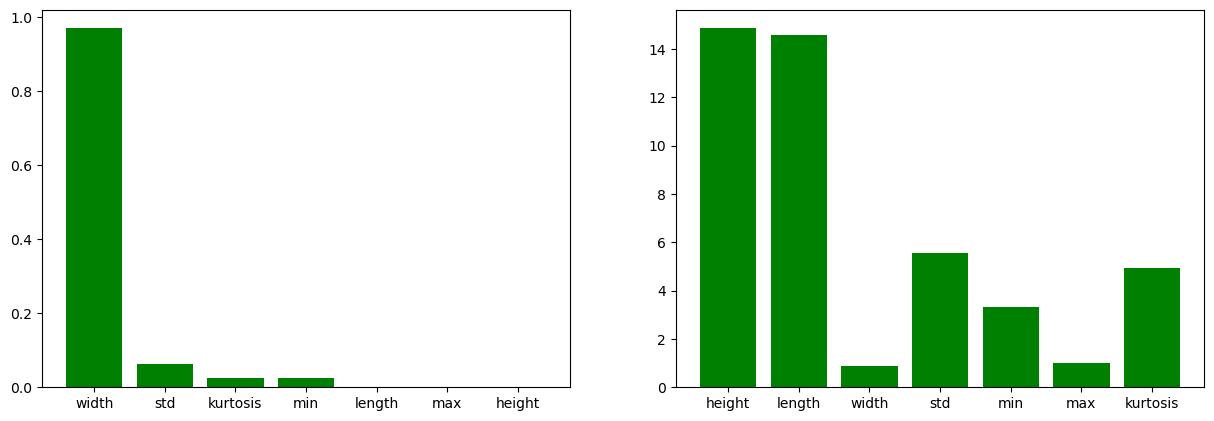

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5), dpi=100, nrows=1, ncols=2)

ax[0].bar(p_values.index, p_values.values, color='green')
ax[1].bar(anova_fvalues.index, anova_fvalues.values,color='green')

In [ ]:
feature_selection = scaled_df[['length', 'height', 'kurtosis']].copy()
kmeansmodel = KMeans(n_clusters= 3 , init='k-means++') #, random_state=0, n_init=10, max_iter = 300
y_kmeans= kmeansmodel.fit_predict(feature_selection)
feature_selection["Cluster"] = y_kmeans
feature_selection['true'] = classes.values

In [ ]:
feature_selection.Cluster = feature_selection.Cluster.replace({2: 0,
                                                   1: 2, 0:1})

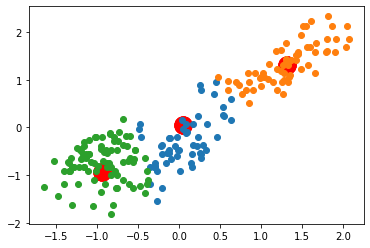

In [ ]:
groups = feature_selection.groupby('Cluster')
for name, group in groups:
    plt.plot(group["length"], group["kurtosis"], scalex=75, scaley=75,marker="o", linestyle="", label=name)
    plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s=300, c='red')

In [ ]:
purity = feature_selection[feature_selection['Cluster'] == feature_selection['true']].shape[0] / feature_selection.shape[0]
print("SELECTED FEATURES PURITY {}".format(round(purity, 4) * 100) )

SELECTED FEATURES PURITY 83.33


In [ ]:
feature_selection = scaled_df[['std', 'length', 'kurtosis']].copy()
kmeansmodel = KMeans(n_clusters= 3 , init='k-means++') #, random_state=0, n_init=10, max_iter = 300
y_kmeans= kmeansmodel.fit_predict(feature_selection)
feature_selection["Cluster"] = y_kmeans
feature_selection['true'] = classes.values

In [ ]:
feature_selection

,std,length,kurtosis,Cluster,true
0,0.304218,0.215462,-0.383577,0,0
1,-0.168625,0.008224,-0.922013,0,0
2,-0.763637,-0.360201,-1.189192,1,0
3,-0.688978,-0.475333,-1.229983,1,0
4,0.066666,0.330595,-0.475356,0,0
...,...,...,...,...,...
205,-1.112048,-1.043321,-1.097413,1,2
206,-1.105261,-1.288937,-0.826156,1,2
207,-0.888070,-0.690247,-0.718060,1,2
208,-1.026077,-1.035645,-0.742535,1,2


In [ ]:
feature_selection.Cluster = feature_selection.Cluster.replace({
                                                   1: 2, 2:1})

In [ ]:
purity = feature_selection[feature_selection['Cluster'] == feature_selection['true']].shape[0] / feature_selection.shape[0]
print("SELECTED FEATURES PURITY {}".format(round(purity, 4) * 100) )

SELECTED FEATURES PURITY 78.57


In [ ]:
feature_selection = scaled_df[['min', 'length', 'height']].copy()
kmeansmodel = KMeans(n_clusters= 3 , init='k-means++') #, random_state=0, n_init=10, max_iter = 300
y_kmeans= kmeansmodel.fit_predict(feature_selection)
feature_selection["Cluster"] = y_kmeans
feature_selection['true'] = classes.values

In [ ]:
feature_selection

,min,length,height,Cluster,true
0,0.141702,0.215462,0.142098,1,0
1,0.197432,0.008224,0.011188,1,0
2,0.208048,-0.360201,-0.192067,1,0
3,0.319508,-0.475333,-0.347091,1,0
4,0.805159,0.330595,0.445257,1,0
...,...,...,...,...,...
205,-0.736716,-1.043321,-0.915515,0,2
206,-1.230328,-1.288937,-1.246235,0,2
207,-0.070604,-0.690247,-0.567571,1,2
208,-1.121521,-1.035645,-1.036090,0,2


In [ ]:
feature_selection.Cluster = feature_selection.Cluster.replace({2:1, 1:0, 0:2})

In [ ]:
purity = feature_selection[feature_selection['Cluster'] == feature_selection['true']].shape[0] / feature_selection.shape[0]
print("SELECTED FEATURES PURITY {}".format(round(purity, 4) * 100) )

SELECTED FEATURES PURITY 84.76


In [ ]:
feature_selection = scaled_df[['std', 'kurtosis', 'min']].copy()
kmeansmodel = KMeans(n_clusters= 3 , init='k-means++') #, random_state=0, n_init=10, max_iter = 300
y_kmeans= kmeansmodel.fit_predict(feature_selection)
feature_selection["Cluster"] = y_kmeans
feature_selection['true'] = classes.values

In [ ]:
feature_selection

,std,kurtosis,min,Cluster,true
0,0.304218,-0.383577,0.141702,1,0
1,-0.168625,-0.922013,0.197432,1,0
2,-0.763637,-1.189192,0.208048,1,0
3,-0.688978,-1.229983,0.319508,1,0
4,0.066666,-0.475356,0.805159,1,0
...,...,...,...,...,...
205,-1.112048,-1.097413,-0.736716,2,2
206,-1.105261,-0.826156,-1.230328,2,2
207,-0.888070,-0.718060,-0.070604,1,2
208,-1.026077,-0.742535,-1.121521,2,2


In [ ]:
feature_selection.Cluster = feature_selection.Cluster.replace({1: 0, 0:1})

In [ ]:
purity = feature_selection[feature_selection['Cluster'] == feature_selection['true']].shape[0] / feature_selection.shape[0]
print("SELECTED FEATURES PURITY {}".format(round(purity, 4) * 100) )

SELECTED FEATURES PURITY 87.62


### ANSWER 

The chisquare graph shows us the least important features and the anova graph shows us the scores for all the features. We can deduce from both the graphs that **WIDTH** is not an important feature in our dataset and should be dropped. Other than width, we came up with 4 different sets of features that we tested for Kmeans clustering and computed their purity scored. 

Feature Set 4 with Std, Kurtosis and Min features has outperformed all the other feature sets by giving the highest purity for K means clustering. 

# Part-2 (Dimensionality Reduction using PCA/SVD) *(15 marks)*

1. For the dataset (clustering.csv), perform PCA.
    - plot the captured variance with respect to increasing latent dimensionality. __(2.5 marks)__
  
  What is the minimum dimension that captures:
    - at least 89% variance? __(1.5 marks)__
    - at least 99% variance? __(1 marks)__

In [ ]:
### 89% Variance

In [ ]:
pca = PCA(.89)
pca_features_1 = pca.fit_transform(feature_selection)
pca_features_1

array([[ 0.51126143,  1.4050402 ],
       [-0.00529866,  1.72091765],
       [-0.47636169,  1.9378661 ],
       [-0.39300392,  1.95151748],
       [ 0.6970174 ,  1.53812585],
       [-0.25274992,  1.78138812],
       [ 0.17435265,  1.47194532],
       [-0.17731106,  1.72768109],
       [ 1.54925254,  0.1630689 ],
       [ 1.28147165,  1.12590226],
       [ 0.44398871,  1.32697191],
       [-0.30192875,  1.69836172],
       [-0.58071247,  1.9272994 ],
       [-0.45134797,  1.78563069],
       [-0.55891144,  1.81659336],
       [-0.45129955,  1.95226005],
       [-0.67657691,  2.05257443],
       [ 0.32152307,  1.69124101],
       [-0.58250258,  2.15230241],
       [-1.39788727,  0.64699149],
       [ 0.05985625,  1.44512992],
       [-0.01518898,  1.46920584],
       [ 0.47589232,  1.61526603],
       [-1.67858065,  0.63098264],
       [ 0.21525187,  1.57204823],
       [ 0.85380071,  1.32517187],
       [-1.30778036,  0.65452132],
       [-1.36459293,  0.60119135],
       [-0.10072866,

In [ ]:
print("Number of Features with 89% Variance: {}".format(pca_features_1.shape[1]))

Number of Features with 89% Variance: 2


### 99% Variance

In [ ]:
pca = PCA(.99)
pca_features_2 = pca.fit_transform(feature_selection)

In [ ]:
print("Number of Features with 99% Variance: {}".format(pca_features_2.shape[1]))

Number of Features with 99% Variance: 4


 2. Determine the purity of clusters formed by the number of principal components which captured 89% and 99% variances respectively. Plot a line graph of the purity scores against the captured variances. Discuss your findings. __(7 marks)__

In [ ]:
pca_features_1 = pd.DataFrame(pca_features_1, columns=['pca1', 'pca2'])
pca_features_2 = pd.DataFrame(pca_features_2, columns=['pca1', 'pca2', 'pca3', 'pca4'])

kmeansmodel = KMeans(n_clusters= 3 , init='k-means++') #, random_state=0, n_init=10, max_iter = 300
y_kmeans= kmeansmodel.fit_predict(pca_features_1)
pca_features_1["Cluster"] = y_kmeans
pca_features_1['true'] = classes.values

In [ ]:
pca_features_1

,pca1,pca2,Cluster,true
0,0.511261,1.405040,0,0
1,-0.005299,1.720918,0,0
2,-0.476362,1.937866,0,0
3,-0.393004,1.951517,0,0
4,0.697017,1.538126,0,0
...,...,...,...,...
205,-2.038044,-0.613127,1,2
206,-2.168188,-0.770044,1,2
207,-0.837470,0.416501,1,2
208,-2.019450,-0.810667,1,2


In [ ]:
pca_features_1['Cluster'] = pca_features_1.Cluster.replace({1: 2,
                                                   2: 1})

In [ ]:
purity1 = pca_features_1[pca_features_1['Cluster'] == pca_features_1['true']].shape[0] / pca_features_1.shape[0]

In [ ]:
print("PURITY WITH 89 VARIANCE: {}".format(round(purity1,3) * 100))

PURITY WITH 89 VARIANCE: 91.0


In [ ]:
kmeansmodel = KMeans(n_clusters= 3 , init='k-means++') #, random_state=0, n_init=10, max_iter = 300
y_kmeans= kmeansmodel.fit_predict(pca_features_2)
pca_features_2["Cluster"] = y_kmeans

In [ ]:
pca_features_2['true'] = classes.values
pca_features_2

,pca1,pca2,pca3,pca4,Cluster,true
0,0.511261,1.405040,0.135607,-0.266211,2,0
1,-0.005299,1.720918,0.064531,0.114409,2,0
2,-0.476362,1.937866,0.048836,0.416158,2,0
3,-0.393004,1.951517,0.012430,0.490869,2,0
4,0.697017,1.538126,-0.030198,0.369597,2,0
...,...,...,...,...,...,...
205,-2.038044,-0.613127,-0.080895,0.549986,1,2
206,-2.168188,-0.770044,0.078978,0.072089,1,2
207,-0.837470,0.416501,1.335974,0.875246,2,2
208,-2.019450,-0.810667,0.060961,0.103629,1,2


In [ ]:
pca_features_2['Cluster'] = pca_features_2.Cluster.replace({1: 2,
                                                   2: 0, 0:1})

In [ ]:
purity2 = pca_features_2[pca_features_2['Cluster'] == pca_features_2['true']].shape[0] / pca_features_2.shape[0]
print("PURITY WITH 99 VARIANCE: {}".format(round(purity2,3)* 100))

PURITY WITH 99 VARIANCE: 87.6


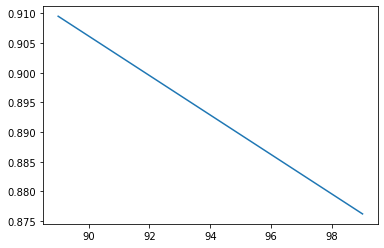

In [ ]:
plt.plot([89, 99], [purity1, purity2])

### ANSWER

We have used the feature matrix produced by PCA with 89% Variance and 99% Variance for K means clustering and compared their results in terms of purity scores. The putiry scores of 89 Variance with total 2 features seems to be significantly better than 99 Variance with 4 features. The 89 Variance gives a purity result of 91% whereas the purity result of 99 Variance is ~88%. Therefore, for this particular dataset, PCA with 89 Variance is a better option

 3. Let's assume you have two datasets one is linear and another is curved structural data.
- Can we apply PCA on these datasets? Justify your answer. __(3 marks)__ 

### Answer

PCA is a linear dimentionality reduction algorithm that works with both linear and curved structural data. The output of PCA is a matrix containing eigenvalues and the idea is to drop the features with eigenvalues close to zero. This gives us a smaller feature matrix that tries to capture most of the information from the dataset.

This process is simple when we have a linear dataset because features that aren't important have eigen values close to 0 which makes it easier to eliminate those features. Whereas, in curve structural data, most of the features are above zero and we have to thoroughly observe the data to decide which features have smaller eigenvalues. Therefore, its easier to perform PCA on a linear dataset as compared to curved structural data. 